In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Data Pre-processing

In [2]:
# Load the dataset 
file_path = '/Users/niveditasaha/Downloads/NEW DATA/Final_structured data.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [3]:
# Step 1: Handling Missing Data
missing_data = df.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 Sample                           0
Max Contraction                  0
Min Contraction                  0
Avg Contraction                  0
Median Contraction               0
Variance Contraction             0
Max Speed of Contraction         0
Min Speed of Contraction         0
Avg Speed of Contraction         0
Median Speed of Contraction      0
Variance Speed of Contraction    0
dtype: int64


In [4]:
# Step 1: Create a copy of the DataFrame 
df_filled = df.copy()

In [5]:
# Step 2: Standardization (Z-score normalization)

numeric_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns


In [6]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [7]:
# Apply standardization (Z-score normalization) to numeric columns
df_filled[numeric_columns] = scaler.fit_transform(df_filled[numeric_columns])



In [8]:
# Display the first few rows of the standardized dataset
print("Standardized Data:\n", df_filled.head())

Standardized Data:
    Sample  Max Contraction  Min Contraction  Avg Contraction  \
0  Normal         1.987935        -0.370438         0.948706   
1  Normal         1.029430         0.473880         1.170690   
2  Normal         1.123894         0.622166         0.970389   
3  Normal        -0.060059         0.068785         0.259923   
4  Normal        -0.060059         0.068785         0.259923   

   Median Contraction  Variance Contraction  Max Speed of Contraction  \
0            0.479210              1.605650                  0.510527   
1            1.081022              0.899841                 -0.477734   
2            0.735106              0.905319                 -0.450743   
3            0.371277             -0.320437                 -0.436193   
4            0.371277             -0.320437                 -0.436193   

   Min Speed of Contraction  Avg Speed of Contraction  \
0                  1.336197                  2.019609   
1                  0.911237               

# Machine learning Model

In [9]:

# Step 1: Separate features (X) and target (y)
X = df_filled.drop('Sample', axis=1)  
y = df_filled['Sample']  



In [10]:
# Step 2: Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
print(label_encoder.classes_)


['Disease' 'Normal']


In [12]:
# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


In [13]:
print("Training set size (X_train):", X_train.shape[0])
print("Training set size (y_train):", y_train.shape[0])
print("Testing set size (X_test):", X_test.shape[0])
print("Testing set size (y_test):", y_test.shape[0])


Training set size (X_train): 59
Training set size (y_train): 59
Testing set size (X_test): 26
Testing set size (y_test): 26


In [14]:
# Step 4: Build a machine learning model (e.g., Random Forest Classifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [15]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.92


In [16]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[ 7  1]
 [ 1 17]]


In [17]:
# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.94      0.94      0.94        18

    accuracy                           0.92        26
   macro avg       0.91      0.91      0.91        26
weighted avg       0.92      0.92      0.92        26



ROC-AUC Score: 0.91


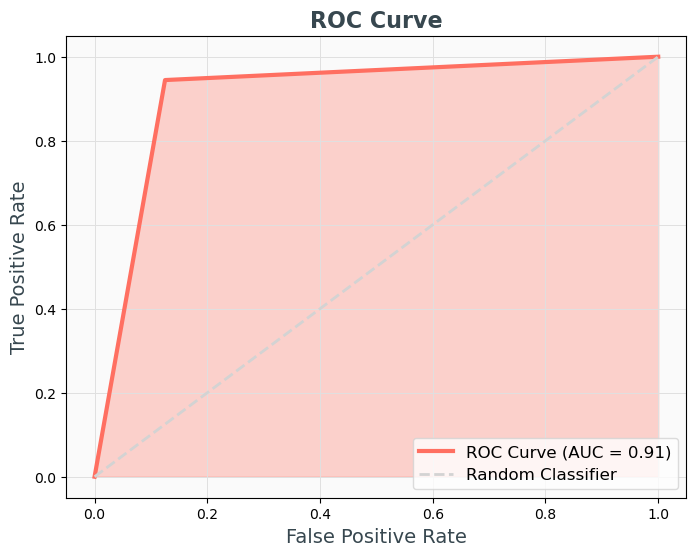

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))  

# ROC curve with a gradient fill under the curve
plt.plot(fpr, tpr, color="#FF6F61", linewidth=3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, color="#FF6F61", alpha=0.3)  
plt.plot([0, 1], [0, 1], color="lightgray", linestyle="--", linewidth=2, label="Random Classifier")  

# Customize the plot
plt.xlabel('False Positive Rate', fontsize=14, color="#37474F")
plt.ylabel('True Positive Rate', fontsize=14, color="#37474F")
plt.title('ROC Curve', fontsize=16, fontweight="bold", color="#37474F")
plt.legend(loc="lower right", fontsize=12, frameon=True, facecolor="white", edgecolor="lightgray")

# Adding a light background grid for a subtle, soft look
plt.grid(color='#E0E0E0', linestyle='-', linewidth=0.7)

# Set a gentle background color
plt.gca().set_facecolor('#FAFAFA')  

# Show the plot
plt.show()


In [19]:


# Define the hyperparameter grid 
param_grid = {
    'n_estimators': [10, 50, 100],      
    'max_depth': [5, 10, None],        
    'min_samples_split': [2, 5, 10]     
}


In [20]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)


In [21]:
# Set up GridSearchCV with scoring metric for balanced performance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='roc_auc')

In [22]:
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [23]:
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
Best Cross-Validation Score: 0.97


In [24]:
# Step 1: Retrain the model with the best hyperparameters
best_model = RandomForestClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)
best_model.fit(X_train, y_train)



RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

In [25]:
# Step 2: Make predictions on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.96


In [26]:
# Step 3: Print the Classification Report and Confusion Matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.94      0.97        18

    accuracy                           0.96        26
   macro avg       0.94      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26

Confusion Matrix:
 [[ 8  0]
 [ 1 17]]


<Figure size 600x600 with 0 Axes>

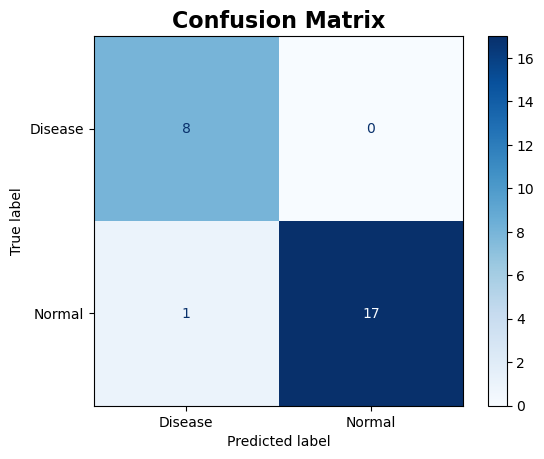

In [27]:
# Add this import at the beginning of your code
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Disease", "Normal"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix", fontsize=16, fontweight="bold")
plt.show()


In [28]:
# Step 4: Calculate and plot the ROC Curve
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


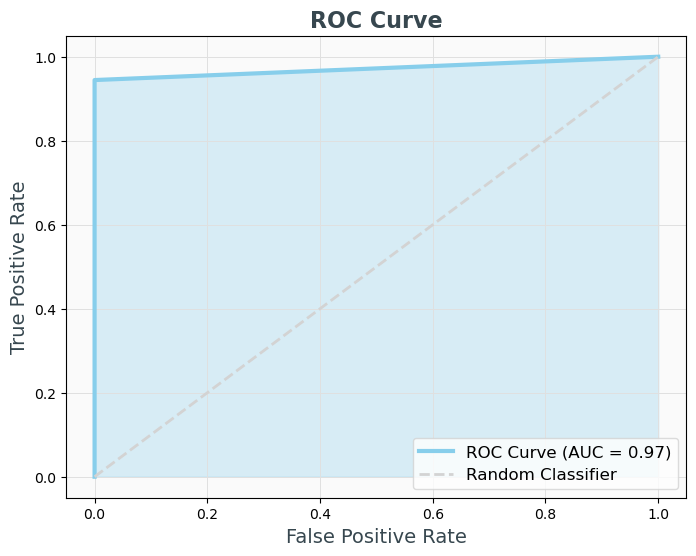

In [29]:


plt.figure(figsize=(8, 6))  

# Change color to light sky blue
light_sky_blue = "#87CEEB"  # Light sky blue color

plt.plot(fpr, tpr, color=light_sky_blue, linewidth=3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, color=light_sky_blue, alpha=0.3)  # Gradient fill under the curve
plt.plot([0, 1], [0, 1], color="lightgray", linestyle="--", linewidth=2, label="Random Classifier")  # Diagonal line

# Customize the plot
plt.xlabel('False Positive Rate', fontsize=14, color="#37474F")
plt.ylabel('True Positive Rate', fontsize=14, color="#37474F")
plt.title('ROC Curve', fontsize=16, fontweight="bold", color="#37474F")
plt.legend(loc="lower right", fontsize=12, frameon=True, facecolor="white", edgecolor="lightgray")

# Adding a light background grid for a subtle, soft look
plt.grid(color='#E0E0E0', linestyle='-', linewidth=0.7)

# Set a gentle background color
plt.gca().set_facecolor('#FAFAFA')  

plt.show()


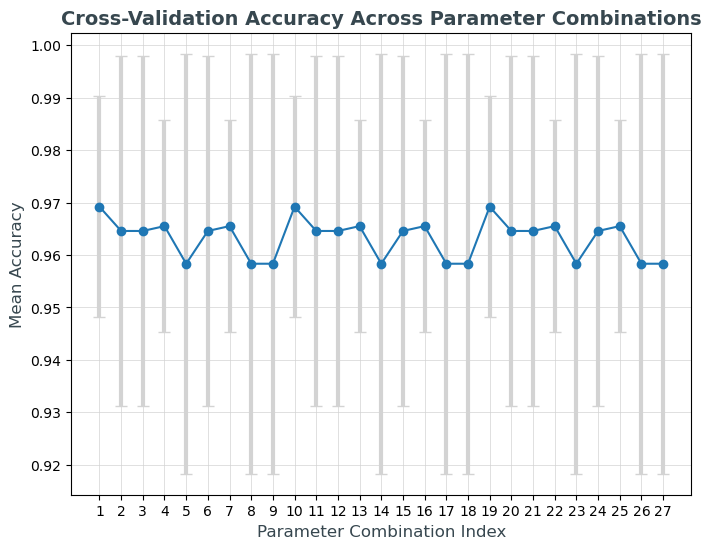

In [30]:

from sklearn.ensemble import RandomForestClassifier

# Define function to plot cross-validation scores with error bars
def plot_cross_val_scores(cv_results):
    # Extract the mean and standard deviation of test scores across folds
    mean_scores = cv_results['mean_test_score']
    std_scores = cv_results['std_test_score']
    
    plt.figure(figsize=(8, 6))  
    plt.errorbar(range(1, len(mean_scores) + 1), mean_scores, yerr=std_scores, fmt='o-', color='#1f77b4', ecolor='lightgray', elinewidth=3, capsize=4)
    plt.title("Cross-Validation Accuracy Across Parameter Combinations", fontsize=14, fontweight="bold", color="#37474F")
    plt.xlabel("Parameter Combination Index", fontsize=12, color="#37474F")
    plt.ylabel("Mean Accuracy", fontsize=12, color="#37474F")
    plt.xticks(range(1, len(mean_scores) + 1))
    plt.grid(color='lightgray', linestyle='-', linewidth=0.5)  
    plt.show()

# Retrieve cross-validation mean and standard deviation from grid search results
cv_results = grid_search.cv_results_

# Call the function with current grid search results
plot_cross_val_scores(cv_results)


# SVM

In [31]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import joblib

# Step 1: Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Scale the features (important for SVM performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the SVM model with class_weight='balanced' for handling class imbalance
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42)

# Step 4: Train the model
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Model Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

     Disease       0.86      0.75      0.80         8
      Normal       0.89      0.94      0.92        18

    accuracy                           0.88        26
   macro avg       0.88      0.85      0.86        26
weighted avg       0.88      0.88      0.88        26

Confusion Matrix:
 [[ 6  2]
 [ 1 17]]


In [32]:
# Step 7: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],       
    'gamma': ['scale', 0.1, 0.01, 0.001],  
    'kernel': ['rbf']              
}

# Using GridSearchCV with cross-validation for best parameter search
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 8: Use the best estimator for predictions on the test set
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

# Evaluate with the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Model Accuracy with Best Parameters: {accuracy_best:.2f}")
print("Classification Report with Best Parameters:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix with Best Parameters:\n", confusion_matrix(y_test, y_pred_best))



Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9818181818181818
Model Accuracy with Best Parameters: 0.88
Classification Report with Best Parameters:
               precision    recall  f1-score   support

     Disease       0.86      0.75      0.80         8
      Normal       0.89      0.94      0.92        18

    accuracy                           0.88        26
   macro avg       0.88      0.85      0.86        26
weighted avg       0.88      0.88      0.88        26

Confusion Matrix with Best Parameters:
 [[ 6  2]
 [ 1 17]]


# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

     Disease       1.00      0.86      0.92         7
      Normal       0.95      1.00      0.97        19

    accuracy                           0.96        26
   macro avg       0.97      0.93      0.95        26
weighted avg       0.96      0.96      0.96        26

Confusion Matrix:
 [[ 6  1]
 [ 0 19]]


In [34]:
# Define parameter grid to search for the best k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Set up GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter and best score
print("Best k:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best estimator for predictions
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate with the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Best k: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best k: {'n_neighbors': 1}
Best Cross-Validation Score: 0.9303030303030303
Model Accuracy with Best k: 1.00
Classification Report:
               precision    recall  f1-score   support

     Disease       1.00      1.00      1.00         7
      Normal       1.00      1.00      1.00        19

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Confusion Matrix:
 [[ 7  0]
 [ 0 19]]


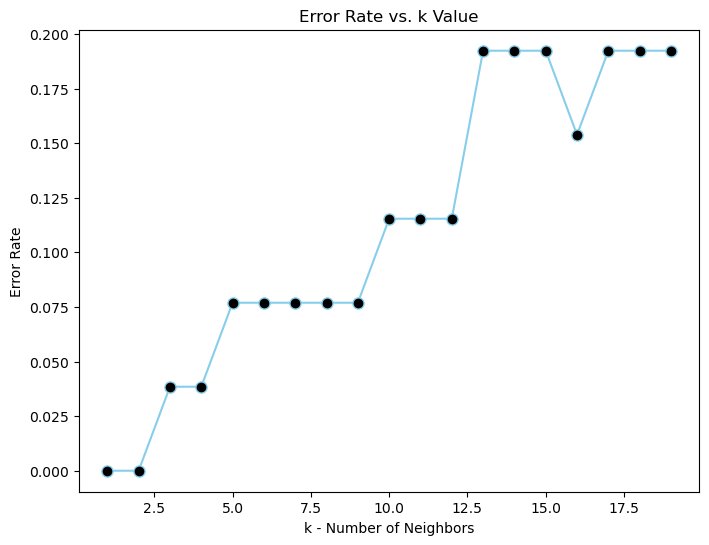

In [36]:
import numpy as np

error_rates = []
k_values = range(1, 20)

# Loop over different values of k to calculate the error rate
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rate = np.mean(y_pred_k != y_test)
    error_rates.append(error_rate)

# Plot error rate vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, color="skyblue", marker='o', markerfacecolor="black", markersize=8)
plt.xlabel("k - Number of Neighbors")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. k Value")
plt.show()


# Correlation Analysis

In [39]:
# Exclude non-numeric columns (like 'Sample')
numeric_df = df_filled.select_dtypes(include=['float64', 'int64'])



In [40]:
# Compute the correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

                               Max Contraction  Min Contraction  \
Max Contraction                       1.000000         0.345858   
Min Contraction                       0.345858         1.000000   
Avg Contraction                       0.794688         0.438102   
Median Contraction                    0.704036         0.430762   
Variance Contraction                  0.865727         0.209320   
Max Speed of Contraction              0.590748         0.087762   
Min Speed of Contraction              0.362279         0.811228   
Avg Speed of Contraction              0.514423         0.379588   
Median Speed of Contraction           0.358411         0.528756   
Variance Speed of Contraction         0.453591        -0.017694   

                               Avg Contraction  Median Contraction  \
Max Contraction                       0.794688            0.704036   
Min Contraction                       0.438102            0.430762   
Avg Contraction                       1.000000      

# Data Visualization

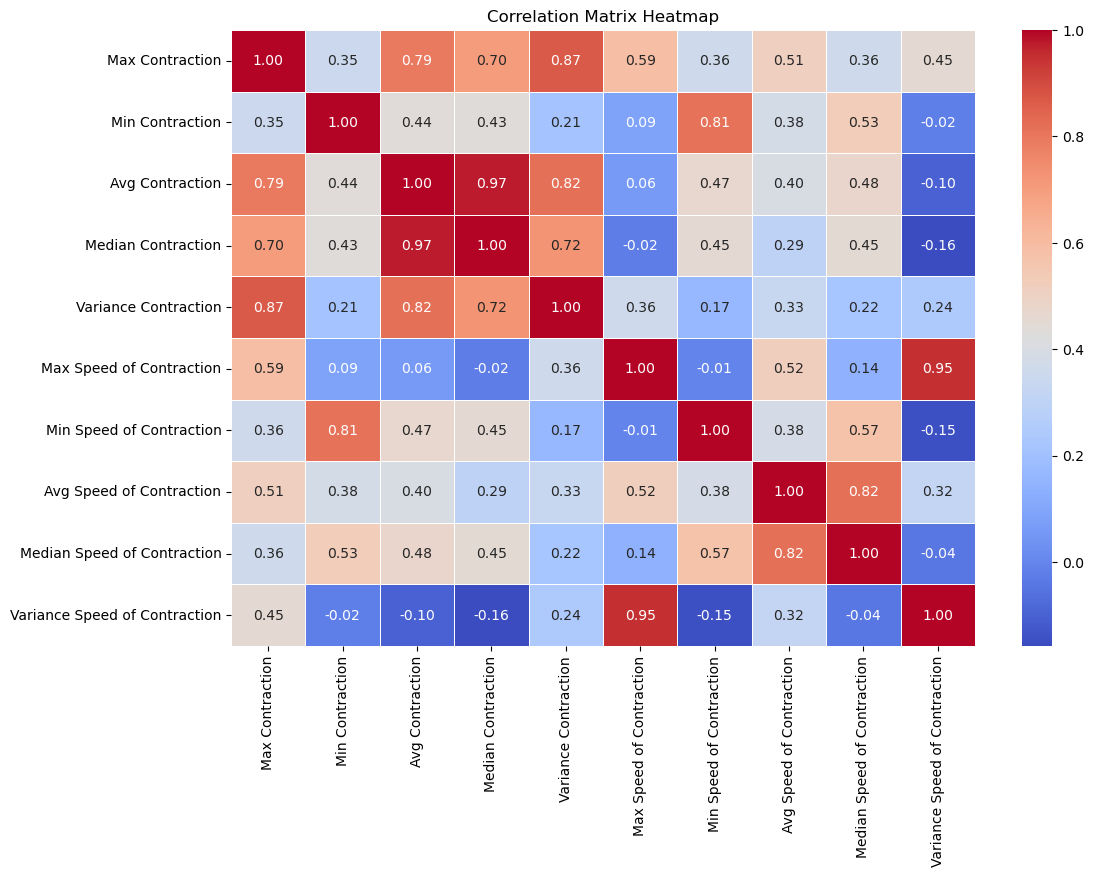

In [28]:
# Set the size of the figure
plt.figure(figsize=(12,8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

# THE END